# HEALTHY SEEDS CLASSIFICATION

## Importing All the libraries

In [3]:
import os
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading the Data

In [2]:
# Define the path to the folder containing the images
data_path = 'E:/1. Tech/Healthy Seed Classification Research/dataset'

# Define the list of class names or labels
class_names = ['chia', 'flax', 'sesame', 'pumpkin', 'sunflower', 'watermelon']

In [3]:
class_names

['chia', 'flax', 'sesame', 'pumpkin', 'sunflower', 'watermelon']

## Data Preprocessing

In [4]:
# Define the input size for the model
input_size = (224, 224)

# Initialize the input data and target variable
X = []
y = []

# Loop through the folders containing the images and load the data
for i, class_name in enumerate(class_names):
    folder_path = os.path.join(data_path, class_name)
    file_names = os.listdir(folder_path)
    for file_name in file_names:
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, input_size)
        X.append(image)
        y.append(i)

In [5]:
# Convert the input data and target variable to numpy arrays

X = np.array(X)
y = np.array(y)

In [6]:
X

array([[[[235, 230, 231],
         [235, 230, 231],
         [235, 230, 231],
         ...,
         [241, 239, 239],
         [241, 239, 239],
         [241, 239, 239]],

        [[235, 230, 231],
         [235, 230, 231],
         [235, 230, 231],
         ...,
         [242, 240, 240],
         [242, 240, 240],
         [242, 240, 240]],

        [[235, 230, 231],
         [235, 230, 231],
         [235, 230, 231],
         ...,
         [244, 242, 242],
         [244, 242, 242],
         [244, 242, 242]],

        ...,

        [[240, 235, 236],
         [240, 235, 236],
         [240, 235, 236],
         ...,
         [242, 237, 238],
         [242, 237, 238],
         [242, 237, 238]],

        [[240, 235, 236],
         [240, 235, 236],
         [240, 235, 236],
         ...,
         [242, 237, 238],
         [242, 237, 238],
         [242, 237, 238]],

        [[240, 235, 236],
         [240, 235, 236],
         [240, 235, 236],
         ...,
         [242, 237, 238],
        

In [ ]:
# The X array contains pixel values for each image in the dataset.

# Each image is represented as a 4-dimensional array, with the first dimension representing the number of images,
# the second and third dimensions representing the height and width of each image,
# and the fourth dimension representing the color channels (e.g., 3 channels for RGB images).

# Before feeding the pixel values into a deep learning model,it is often a good practice to normalize the values.
# This can help improve the performance and speed up the training process.
# Normalization involves scaling the pixel values to a range between 0 and 1 or -1 and 1.
# This can be done using the min-max scaling or standardization methods.

In [7]:
## Normalization 
X = X.astype('float32') / 255.0

In [8]:
X

array([[[[0.92156863, 0.9019608 , 0.90588236],
         [0.92156863, 0.9019608 , 0.90588236],
         [0.92156863, 0.9019608 , 0.90588236],
         ...,
         [0.94509804, 0.9372549 , 0.9372549 ],
         [0.94509804, 0.9372549 , 0.9372549 ],
         [0.94509804, 0.9372549 , 0.9372549 ]],

        [[0.92156863, 0.9019608 , 0.90588236],
         [0.92156863, 0.9019608 , 0.90588236],
         [0.92156863, 0.9019608 , 0.90588236],
         ...,
         [0.9490196 , 0.9411765 , 0.9411765 ],
         [0.9490196 , 0.9411765 , 0.9411765 ],
         [0.9490196 , 0.9411765 , 0.9411765 ]],

        [[0.92156863, 0.9019608 , 0.90588236],
         [0.92156863, 0.9019608 , 0.90588236],
         [0.92156863, 0.9019608 , 0.90588236],
         ...,
         [0.95686275, 0.9490196 , 0.9490196 ],
         [0.95686275, 0.9490196 , 0.9490196 ],
         [0.95686275, 0.9490196 , 0.9490196 ]],

        ...,

        [[0.9411765 , 0.92156863, 0.9254902 ],
         [0.9411765 , 0.92156863, 0.9254902 ]

## Splitting the Data into Training and Validation sets

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_val

array([[[[0.91764706, 0.89411765, 0.8980392 ],
         [0.92941177, 0.9019608 , 0.90588236],
         [0.92941177, 0.90588236, 0.9098039 ],
         ...,
         [0.8627451 , 0.8392157 , 0.84313726],
         [0.85882354, 0.8352941 , 0.8392157 ],
         [0.85882354, 0.8352941 , 0.8392157 ]],

        [[0.91764706, 0.89411765, 0.8980392 ],
         [0.9254902 , 0.9019608 , 0.90588236],
         [0.92941177, 0.90588236, 0.9098039 ],
         ...,
         [0.85882354, 0.8352941 , 0.8392157 ],
         [0.85882354, 0.8352941 , 0.8352941 ],
         [0.85882354, 0.8352941 , 0.8352941 ]],

        [[0.91764706, 0.8901961 , 0.89411765],
         [0.9254902 , 0.9019608 , 0.90588236],
         [0.92941177, 0.90588236, 0.9098039 ],
         ...,
         [0.8509804 , 0.83137256, 0.8352941 ],
         [0.8509804 , 0.827451  , 0.83137256],
         [0.8509804 , 0.827451  , 0.83137256]],

        ...,

        [[0.9098039 , 0.8901961 , 0.89411765],
         [0.9137255 , 0.89411765, 0.8980392 ]

In [11]:
y_val

array([5, 3, 3, 3, 5, 2, 3, 2, 2, 1, 0, 3, 4, 5, 3, 3, 3, 1, 4, 1, 3, 3,
       3, 0, 1, 1, 1, 0, 4, 3, 0, 2, 4, 0, 1, 5, 3, 1, 1, 3, 2, 5, 5, 1,
       0, 3, 2, 2, 1, 1, 1, 3, 0, 5, 5, 3, 2, 1, 3, 3, 3, 0, 3, 2, 2, 4,
       0, 1, 1, 0, 5, 2, 2, 0, 4, 2, 1, 3, 0, 2, 2, 3, 3, 2, 5, 2, 0, 3,
       4, 2, 4, 0, 1, 0, 1, 3, 5, 3, 4, 4, 0, 1, 2, 2, 4, 5, 0, 2, 3, 4,
       5, 2, 5, 2, 1, 5, 5, 1, 2, 4, 4, 2, 5, 4, 3, 5, 5, 1, 3, 1, 1, 0,
       2, 5, 1, 5, 0, 1, 2, 0, 1, 4, 3, 4, 4, 4, 5, 5, 3, 1, 4, 1, 2, 3,
       2, 3, 1, 4, 0, 4, 1, 4, 5, 1, 4, 5, 2, 0, 5, 1, 5, 0, 1, 1, 3, 1,
       3, 1, 1, 5, 0, 0, 4, 1, 3, 3, 0, 4, 4, 4, 0, 3, 5, 5, 4, 1, 4, 2,
       0, 2, 2, 5, 3, 3, 1, 3, 3, 0, 4, 4, 2, 4, 2, 5, 5, 2, 0, 0, 4, 2,
       3, 2, 1, 4, 2, 5, 0, 2, 5, 3, 2, 0, 2, 0, 3, 3, 4, 0, 5, 5, 1, 5,
       0, 5, 1, 3, 4, 0, 0, 3, 3, 4, 0, 0, 5, 3, 4, 0, 1, 4, 2, 1, 0, 4,
       4, 2, 5, 5, 2, 3, 5, 2, 0, 1, 3, 1, 2, 4, 5, 3, 2, 0, 4, 3, 2, 5,
       0, 3, 3, 1, 2, 4, 5, 0, 2, 1, 4, 3, 3, 4, 1,

In [12]:
## one hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

### Checking all the data

In [13]:
X

array([[[[0.92156863, 0.9019608 , 0.90588236],
         [0.92156863, 0.9019608 , 0.90588236],
         [0.92156863, 0.9019608 , 0.90588236],
         ...,
         [0.94509804, 0.9372549 , 0.9372549 ],
         [0.94509804, 0.9372549 , 0.9372549 ],
         [0.94509804, 0.9372549 , 0.9372549 ]],

        [[0.92156863, 0.9019608 , 0.90588236],
         [0.92156863, 0.9019608 , 0.90588236],
         [0.92156863, 0.9019608 , 0.90588236],
         ...,
         [0.9490196 , 0.9411765 , 0.9411765 ],
         [0.9490196 , 0.9411765 , 0.9411765 ],
         [0.9490196 , 0.9411765 , 0.9411765 ]],

        [[0.92156863, 0.9019608 , 0.90588236],
         [0.92156863, 0.9019608 , 0.90588236],
         [0.92156863, 0.9019608 , 0.90588236],
         ...,
         [0.95686275, 0.9490196 , 0.9490196 ],
         [0.95686275, 0.9490196 , 0.9490196 ],
         [0.95686275, 0.9490196 , 0.9490196 ]],

        ...,

        [[0.9411765 , 0.92156863, 0.9254902 ],
         [0.9411765 , 0.92156863, 0.9254902 ]

In [15]:
X_val

array([[[[0.00304498, 0.00301423, 0.00301423],
         [0.00299885, 0.00296809, 0.00296809],
         [0.00318339, 0.00316801, 0.00316801],
         ...,
         [0.00270665, 0.00269127, 0.00273741],
         [0.00276817, 0.00275279, 0.00276817],
         [0.00262976, 0.00261438, 0.00264514]],

        [[0.00312188, 0.00307574, 0.00307574],
         [0.00319877, 0.00316801, 0.00316801],
         [0.00306036, 0.0030296 , 0.0030296 ],
         ...,
         [0.00262976, 0.00261438, 0.00264514],
         [0.00250673, 0.00249135, 0.00252211],
         [0.00264514, 0.00262976, 0.00266052]],

        [[0.00313725, 0.00306036, 0.00307574],
         [0.00312188, 0.00306036, 0.00307574],
         [0.00309112, 0.00306036, 0.00306036],
         ...,
         [0.00266052, 0.00264514, 0.00267589],
         [0.00264514, 0.00261438, 0.00264514],
         [0.00267589, 0.00264514, 0.00267589]],

        ...,

        [[0.0030296 , 0.0028912 , 0.00284506],
         [0.00309112, 0.00293733, 0.0028912 ]

In [16]:
X.shape

(2104, 224, 224, 3)

In [17]:
X_train.shape

(1683, 224, 224, 3)

In [18]:
X_val.shape

(421, 224, 224, 3)

In [19]:
y

array([0, 0, 0, ..., 5, 5, 5])

In [20]:
y_val

array([[0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [14]:
y.shape

(2448,)

In [15]:
y_train.shape

(1958, 6)

In [16]:
y_val.shape

(490, 6)

## Model Creation (CNN)

In [17]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the last convolutional layer
model.add(Flatten())

# Add dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Fitting

In [20]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
62/62 [==============================] - 82s 1s/step - loss: 1.2737 - accuracy: 0.4826 - val_loss: 0.7838 - val_accuracy: 0.7469
Epoch 2/10
62/62 [==============================] - 83s 1s/step - loss: 0.7108 - accuracy: 0.7171 - val_loss: 0.3513 - val_accuracy: 0.8816
Epoch 3/10
62/62 [==============================] - 70s 1s/step - loss: 0.3666 - accuracy: 0.8718 - val_loss: 0.2176 - val_accuracy: 0.9102
Epoch 4/10
62/62 [==============================] - 77s 1s/step - loss: 0.2661 - accuracy: 0.9122 - val_loss: 0.0241 - val_accuracy: 0.9980
Epoch 5/10
62/62 [==============================] - 78s 1s/step - loss: 0.1127 - accuracy: 0.9617 - val_loss: 0.0169 - val_accuracy: 0.9959
Epoch 6/10
62/62 [==============================] - 77s 1s/step - loss: 0.3683 - accuracy: 0.8953 - val_loss: 0.0482 - val_accuracy: 0.9898
Epoch 7/10
62/62 [==============================] - 80s 1s/step - loss: 0.1394 - accuracy: 0.9535 - val_loss: 0.0361 - val_accuracy: 0.9837
Epoch 8/10
62/62 [==

In [ ]:
# Save the trained model
model.save('seed_classification_model.h5')

In [21]:
val_acc_scores = history.history['val_accuracy']
val_acc_scores

[0.7469387650489807,
 0.8816326260566711,
 0.9102040529251099,
 0.9979591965675354,
 0.9959183931350708,
 0.9897959232330322,
 0.9836734533309937,
 0.9959183931350708,
 0.9979591965675354,
 1.0]

In [22]:
train_acc_score = history.history['accuracy']
train_acc_score

[0.48263534903526306,
 0.7170582413673401,
 0.8718079924583435,
 0.912155270576477,
 0.9616956114768982,
 0.895301342010498,
 0.9535239934921265,
 0.9652706980705261,
 0.9811031818389893,
 0.9729315638542175]

## Testing on new Data

In [2]:
# Load and preprocess the test data
test_data_path = r'E:\1. Tech\Healthy Seed Classification Research\Test Data'
X_test = []
y_test = []
for i, class_name in enumerate(class_names):
    folder_path = os.path.join(test_data_path, class_name)
    file_names = os.listdir(folder_path)
    for file_name in file_names:
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, input_size)
        X_test.append(image)
        y_test.append(i)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


13/13 [==============================] - 2s 182ms/step - loss: 0.0579 - accuracy: 0.9769
Test Loss: 0.057850733399391174
Test Accuracy: 0.9769230484962463


## Visualizing

In [30]:
import matplotlib.pyplot as plt

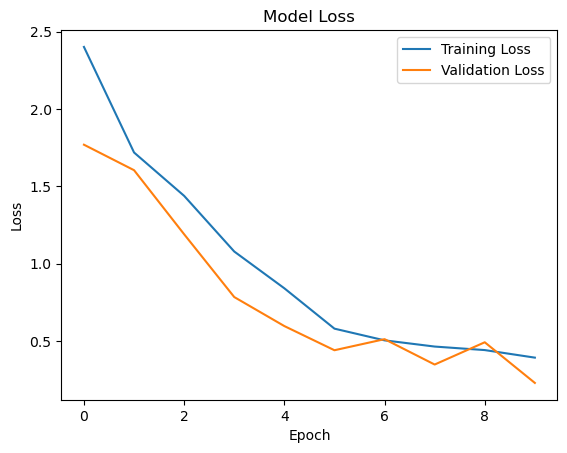

In [31]:
# get the training and validation loss from the history object

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# create a figure and axis object
fig, ax = plt.subplots()

# plot the training and validation loss
ax.plot(train_loss, label='Training Loss')
ax.plot(val_loss, label='Validation Loss')

# set the title and axis labels
ax.set_title('Model Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# add a legend
ax.legend()

# show the plot
plt.show()

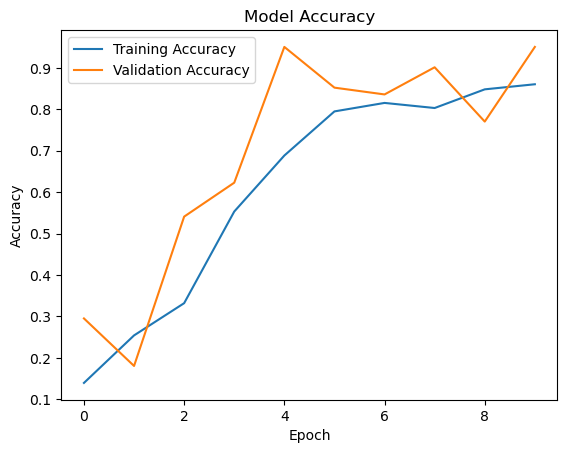

In [32]:
# get the training and validation accuracy from the history object

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# create a figure and axis object
fig, ax = plt.subplots()

# plot the training and validation accuracy
ax.plot(train_acc, label='Training Accuracy')
ax.plot(val_acc, label='Validation Accuracy')

# set the title and axis labels
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

# add a legend
ax.legend()

# show the plot
plt.show()


# Complete Healthy Seeds Classification Program

In [1]:
#### LIBRARIES:

import os
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### LOADING DATA:

# Define the path to the folder containing the images
data_path = 'E:/1. Tech/Healthy Seed Classification Research/dataset'

# Define the list of class names or labels
class_names = ['chia', 'flax', 'sesame', 'pumpkin', 'sunflower', 'watermelon']

#### DATA PREPROCESSING:

# Define the input size for the model
input_size = (224, 224)

# Initialize the input data and target variable
X = []
y = []

# Loop through the folders containing the images and load the data
for i, class_name in enumerate(class_names):
    folder_path = os.path.join(data_path, class_name)
    file_names = os.listdir(folder_path)
    for file_name in file_names:
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, input_size)
        X.append(image)
        y.append(i)
        
# Convert the input data and target variable to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalization 
X = X.astype('float32') / 255.0

#### DATA SPLITTING:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# one hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

#### MODEL CREATION:

model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the last convolutional layer
model.add(Flatten())

# Add dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### MODEL FITTING:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
42/42 [==============================] - 58s 1s/step - loss: 1.9006 - accuracy: 0.2746 - val_loss: 1.2980 - val_accuracy: 0.4732
Epoch 2/10
42/42 [==============================] - 55s 1s/step - loss: 1.1214 - accuracy: 0.5276 - val_loss: 0.6383 - val_accuracy: 0.7560
Epoch 3/10
42/42 [==============================] - 51s 1s/step - loss: 0.7204 - accuracy: 0.6881 - val_loss: 0.5424 - val_accuracy: 0.8095
Epoch 4/10
42/42 [==============================] - 53s 1s/step - loss: 0.6795 - accuracy: 0.7336 - val_loss: 0.4167 - val_accuracy: 0.8304
Epoch 5/10
42/42 [==============================] - 57s 1s/step - loss: 0.3520 - accuracy: 0.8687 - val_loss: 0.3170 - val_accuracy: 0.8571
Epoch 6/10
42/42 [==============================] - 52s 1s/step - loss: 0.2738 - accuracy: 0.9052 - val_loss: 0.1258 - val_accuracy: 0.9583
Epoch 7/10
42/42 [==============================] - 51s 1s/step - loss: 0.1669 - accuracy: 0.9425 - val_loss: 0.0879 - val_accuracy: 0.9702
Epoch 8/10
42/42 [==

# GUI

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

# Create the Tkinter GUI window
window = tk.Tk()
window.title("Seed Classification")

# Load the trained model
model = load_model('seed_classification_model.h5')

# Define the class names
class_names = ['chia', 'flax', 'sesame', 'pumpkin', 'sunflower', 'watermelon']

# Function to handle image selection and prediction
def select_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        image = Image.open(file_path).resize(input_size)
        image = np.array(image)
        image = image.astype('float32') / 255.0
        image = np.expand_dims(image, axis=0)
        
        # Make the prediction
        prediction = model.predict(image)
        predicted_class = np.argmax(prediction)
        predicted_label = class_names[predicted_class]
        
        # Display the image and predicted label
        img_label.config(text="Predicted Class: " + predicted_label)
        img = Image.open(file_path).resize((200, 200))
        img_tk = ImageTk.PhotoImage(img)
        img_panel.configure(image=img_tk)
        img_panel.image = img_tk

# Create a button to select the image
select_button = tk.Button(window, text="Select Image", command=select_image)
select_button.pack(pady=10)

# Create a label to display the predicted class
img_label = tk.Label(window, text="Predicted Class: ")
img_label.pack()

# Create a panel to display the image
img_panel = tk.Label(window)
img_panel.pack()

# Set the input size for resizing the uploaded image
input_size = (224, 224)

# Run the Tkinter event loop
window.mainloop()

# END